In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import bs4 as bs
import requests


Bad key "text.kerning_factor" on line 4 in
C:\Users\amuni\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
plt.style.use('fivethirtyeight')

In [17]:
import bs4 as bs
import requests
import yfinance as yf
import datetime

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2019,12,31)
data = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  505 of 505 completed

5 Failed downloads:
- CARR: Data doesn't exist for startDate = 946702800, endDate = 1577768400
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- OTIS: Data doesn't exist for startDate = 946702800, endDate = 1577768400
- LUMN: No data found for this date range, symbol may be delisted


In [18]:
#Slice Open Prices
sp500_open=data.iloc[:, data.columns.get_level_values(0)=='Open']
sp500_open.head()
#Slice Adj. Close Prices
sp500_adjclose=data.iloc[:, data.columns.get_level_values(0)=='Adj Close']
sp500_adjclose.head()

Adj Close                                             \
                             A AAL AAP      AAPL ABBV       ABC      ABMD   
Date                                                                        
2000-01-03 00:00:00  44.683800 NaN NaN  0.863657  NaN  2.968561  18.25000   
2000-01-04 00:00:00  41.270466 NaN NaN  0.790842  NaN  2.765887  17.81250   
2000-01-05 00:00:00  38.710434 NaN NaN  0.802415  NaN  2.980481  18.00000   
2000-01-06 00:00:00  37.236496 NaN NaN  0.732975  NaN  3.206998  18.03125   
2000-01-07 00:00:00  40.339535 NaN NaN  0.767695  NaN  3.624268  17.93750   

                                              ...                        \
                          ABT ACN       ADBE  ...       XLNX        XOM   
Date                                          ...                         
2000-01-03 00:00:00  6.539179 NaN  16.274673  ...  33.169758  20.730383   
2000-01-04 00:00:00  6.352343 NaN  14.909401  ...  32.415897  20.333307   
2000-01-05 00:00:00  6.340668 NaN  15.204173  ...  31.706371  21.441793   
2000-01-06 00:00:00  6.562534 NaN  15.328290  ...  28.957006  22.550280   
2000-01-07 00:00:00  6.632595 NaN  16.072983  ...  32.238522  22.484110   

                                                                       \
                         XRAY        XRX XYL       YUM ZBH       ZBRA   
Date                                                                    
2000-01-03 00:00:00  6.938441  51.060867 NaN  4.988526 NaN  25.027779   
2000-01-04 00:00:00  6.938441  48.685936 NaN  4.888254 NaN  24.666666   
2000-01-05 00:00:00  7.058388  51.192802 NaN  4.913321 NaN  25.138889   
2000-01-06 00:00:00  7.067613  50.137272 NaN  4.871542 NaN  23.777779   
2000-01-07 00:00:00  7.049161  51.324734 NaN  4.762912 NaN  23.513889   

                                    
                          ZION ZTS  
Date                                
2000-01-03 00:00:00  40.342747 NaN  
2000-01-04 00:00:00  38.389206 NaN  
2000-01-05 00:00:00  38.343781 NaN  
2000-01-06 00:00:00  38.888947 NaN  
2000-01-07 00:00:00  38.979809 NaN  

[5 rows x 505 columns]

In [3]:
# Scrap sp500 tickers
def save_sp500_tickers():

    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'html')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        if not '.' in ticker:
            tickers.append(ticker.replace('\n',''))
        
    return tickers

tickers = save_sp500_tickers()

In [4]:
prices = yf.download(tickers, start='2020-01-01')['Adj Close'] 

[*********************100%***********************]  503 of 503 completed


In [19]:
rs = sp500_adjclose.apply(np.log).diff(1)

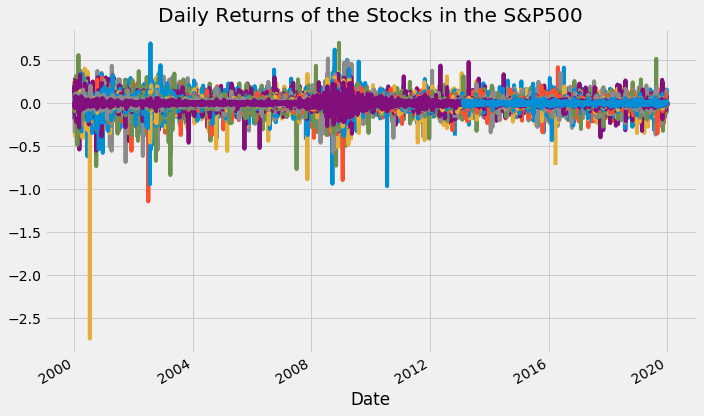

In [20]:
rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

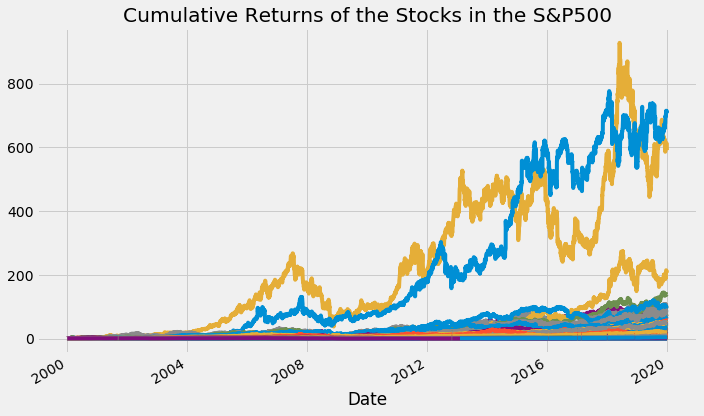

In [21]:
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(1).fit(rs.fillna(0))

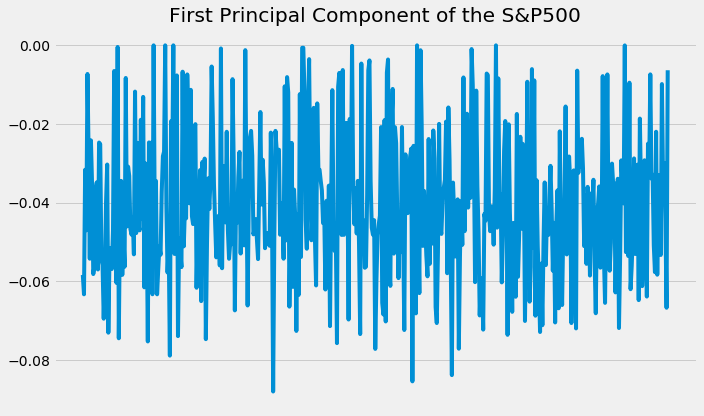

In [24]:
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

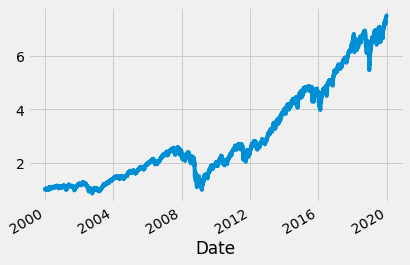

In [25]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)
myrs.cumsum().apply(np.exp).plot()

In [26]:
prices = yf.download(['SPY'], start=start, end=end)['Adj Close'] 

[*********************100%***********************]  1 of 1 completed


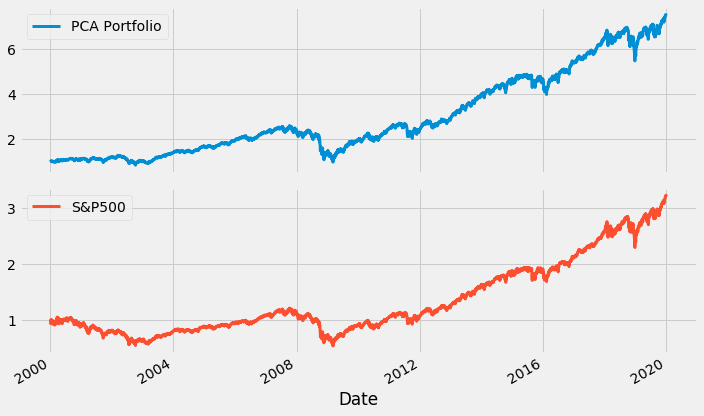

In [27]:
rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
plt.savefig('tmp.png')

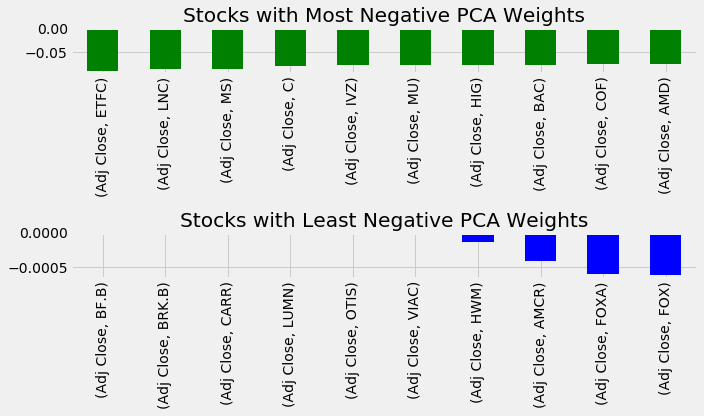

In [28]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()
plt.savefig('tmp.png')

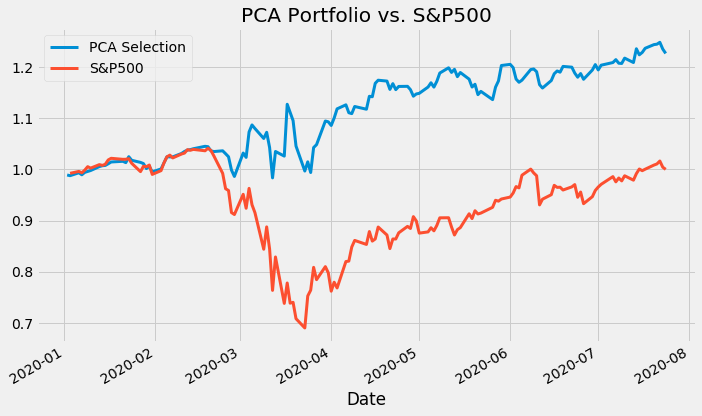

In [15]:
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
prices['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P500'])

plt.tight_layout()
plt.savefig('tmp.png')

In [30]:
covid_start='2020-03-01'
covid_end='2020-06-30'
data_covid = yf.download(tickers, start=covid_start, end=covid_end)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [ ]:
data_covid.